In [ ]:
import pandas as pd                 
import math                         
data = pd.read_csv("/content/Electric_Production.csv")     
print(data.head())                  

Y = data['IPG2211A2N']           # masukkan data IPG2211A2N ke dalam Y
Y = Y.tolist()                   # memasukkan nilai 'IPG2211A2N' atau Y kedalam list
date = data['DATE']              # --> deklarasi kolom DATE ke dalam date
date = date.tolist()

# Menambahkan kolom baru bernilai 1-i, karena kolom 'DATE' tidak bisa dimasukkan ke dalam perhitungan rumus karena berbentuk tanggal
data['X'] = 0 #buat kolom bernama x dengan nilai 0

X = data['X']
X.tolist()

for i in range(0, len(Y)):
    X[i] = i+1
    #print(X[i])

       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151


<ipython-input-3-1aa9ffd30588>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = i+1


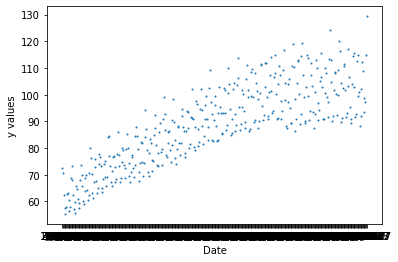

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(date, Y, s = 1)  
#plt.grid()              
plt.xlabel("Date")              
plt.ylabel("y values")              
plt.show()                          

In [ ]:
def gradient_descent(X, Y, w, b, alpha):
 
    dl_dw = 0.0                  
    dl_db = 0.0                  
    N = len(X)               

    for i in range(N):            
        dl_dw += -1*X[i] * (Y[i] - (w*X[i] + b))  
        dl_db += -1*(Y[i] - (w*X[i] + b))     

    w = w - (1/float(N)) * dl_dw * alpha      
    b = b - (1/float(N)) * dl_db * alpha      

    return w, b

from decimal import Decimal
def cost_function (X, Y, w, b):

    N = len(X)                    
    total_error = 0.0             
    total_error = Decimal(total_error)
    for i in range(N):           
        total_error += Decimal(Y[i] - (w*X[i] - b))**2   # mengubah float ke decimal karena nilai dibelakangan koma terlalu banyak prev--> total_error += Decimal(Y[i] - (w*X[i] - b))**2
        
    return total_error / Decimal(2*float(N))  # menambahkan fungsi float prev->  return total_error / (2*float(N)) 

def train(X, Y, w, b, alpha, n_iter):

    for i in range(n_iter):                        
        w, b = gradient_descent(X, Y, w, b, alpha) 

        if i % 800 == 0:                           
            print ("iteration:", i, "cost: ", cost_function(X, Y, w, b)) 
    return w, b                                   

def predict(x, w, b):                             
    return x*w + b

In [ ]:
w, b = train(X, Y, 59.0, 59.0, 0.00000001, 18000)

x_new = 50.0
y_new = predict(x_new, w, b)
print("\n\nUji prediksi dengan satu data\n\nnilai y jika x = 50", y_new) 

# data_test = pd.read_csv("/content/Electric_Production.csv")                 
# x_test = data_test['x']                 # load data test yang sudah dipisah           
# y_test = data_test['y']
x_test = X[:100]
y_test = Y[:100]
y_prediction = list()  
n = len(x_test)                                     
for i in range(n):                                  
  y_new = predict(x_test[i], w, b)                  
  y_prediction.append(y_new)                        

print("\n\nnilai x, nilai test y, nilai prediksi y")                  
for i in range(n):
  if i%30 == 0:         # pembatas mencetak hanya kelipatan 30                            
    print(x_test[i],"     ", y_test[i], "     ", y_prediction[i])

iteration: 0 cost:  89878247.63764861012749117544
iteration: 800 cost:  38340129.30075890134592800822
iteration: 1600 cost:  16286232.03779877500900423455
iteration: 2400 cost:  6873419.917158158080050096501
iteration: 3200 cost:  2871997.513367202196260624951
iteration: 4000 cost:  1181583.781686661679910026927
iteration: 4800 cost:  474497.8917959843392935643297
iteration: 5600 cost:  183425.0663392509379121128641
iteration: 6400 cost:  66769.52228482462791069246899
iteration: 7200 cost:  22184.39702484450938208272764
iteration: 8000 cost:  6669.338904475057442968753126
iteration: 8800 cost:  2395.448598869779019690568191
iteration: 9600 cost:  2129.796799268392690996037626
iteration: 10400 cost:  3046.436769916720670098718625
iteration: 11200 cost:  4116.559819212489241370174491
iteration: 12000 cost:  5019.964879327672558326251707
iteration: 12800 cost:  5699.083952926980577183784276
iteration: 13600 cost:  6181.697754104458118007467807
iteration: 14400 cost:  6514.2003587844621696

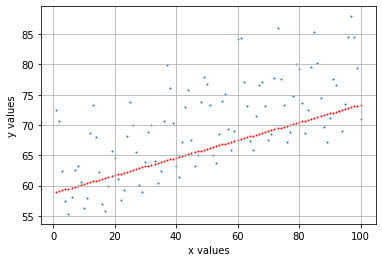

In [ ]:
plt.scatter(x_test, y_test, s = 1)    
plt.scatter(x_test, y_prediction, c="Red", s = 1, zorder=1)
plt.grid()                          
plt.xlabel("x values")              
plt.ylabel("y values")              
plt.show()                          

In [ ]:
for i in range(len(y_test)):
  error = (y_test[i] - abs(y_prediction[i]))**2

mse = error / len(y_test)

print("Mean squared error (MSE): ", mse)
print("Root mean squared error (RMSE) :", math.sqrt(mse))

Mean squared error (MSE):  0.052601832369622306
Root mean squared error (RMSE) : 0.22935089354441657


In [ ]:
df.iloc[:(round(0.8*len(x1))), :]
df.iloc[(round(0.8*len(x1))):, :]

data